# To Predict the Loan Status Of Customer Based On Customer Previous Credit History and Other Features

###  
Variable	     Description



Loan_ID	      :    Unique Loan ID


Gender        :     Male/ Female


Married	        :   Applicant married (Y/N)


Dependents	    :  Number of dependents


Education	     :  Applicant Education (Graduate/ Under Graduate)


Self_Employed	  : Self employed (Y/N)


ApplicantIncome	  :  Applicant income


CoapplicantIncome	: Coapplicant income


LoanAmount	     :   Loan amount in thousands


Loan_Amount_Term	: Term of loan in months


Credit_History	   :   credit history meets guidelines



Property_Area	    :  Urban/ Semi Urban/ Rural



Loan_Status	       :   (Target) Loan approved (Y/N)






In [1]:
## importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the test & train data:
data_train = pd.read_csv('Desktop/PPT/DataSets/loan_prediction/train_ctrUa4K.csv')
data_test = pd.read_csv('Desktop/PPT/DataSets/loan_prediction/test_lAUu6dG.csv')

In [4]:
#train data shape
data_train.shape

(614, 13)

In [5]:
#test data shape
data_test.shape

(367, 12)

In [6]:
# train data first 5 Rows:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# test data first 5 Rows:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# Null Values in each columns:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### To get null values in each columns in visualization wise by 'MissingNo' Library:

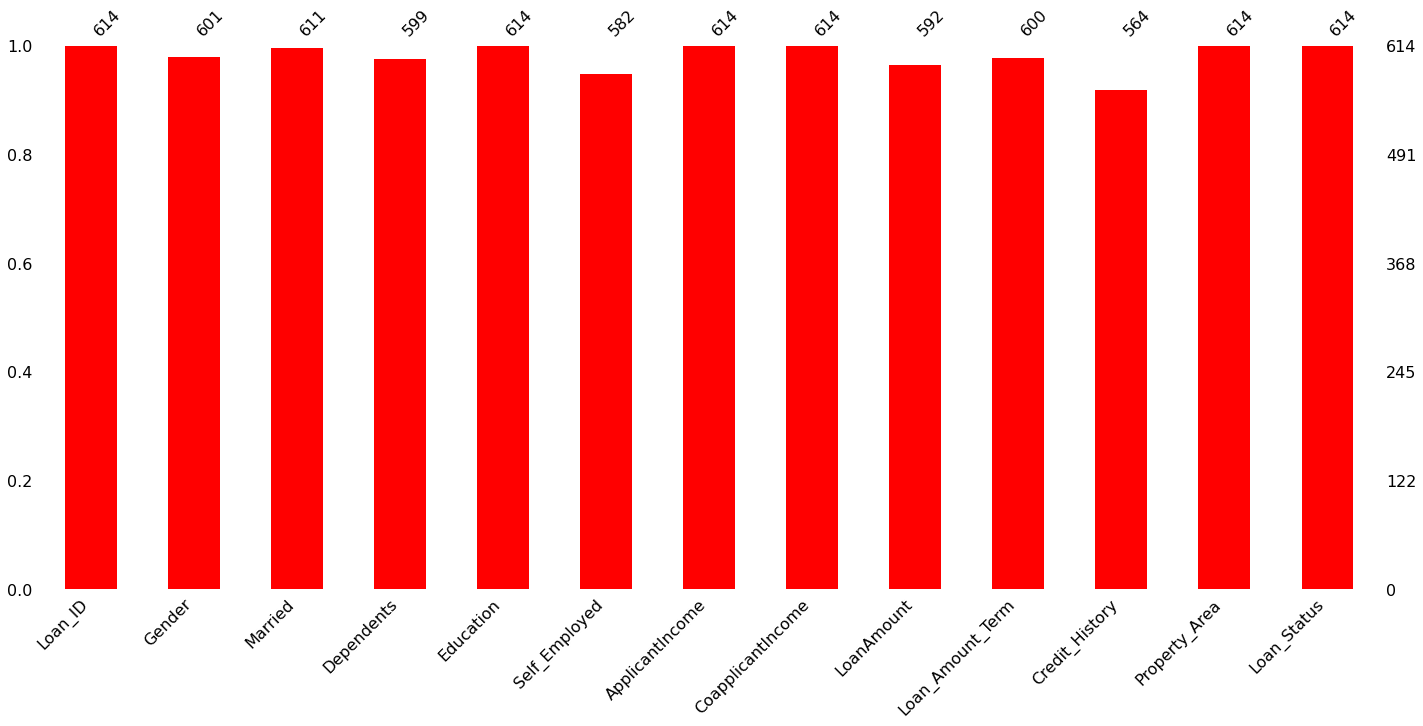

In [9]:
# visualizing Null values in Train Data in each columns:
import missingno as msno
msno.bar(data_train,color='red')
plt.show()

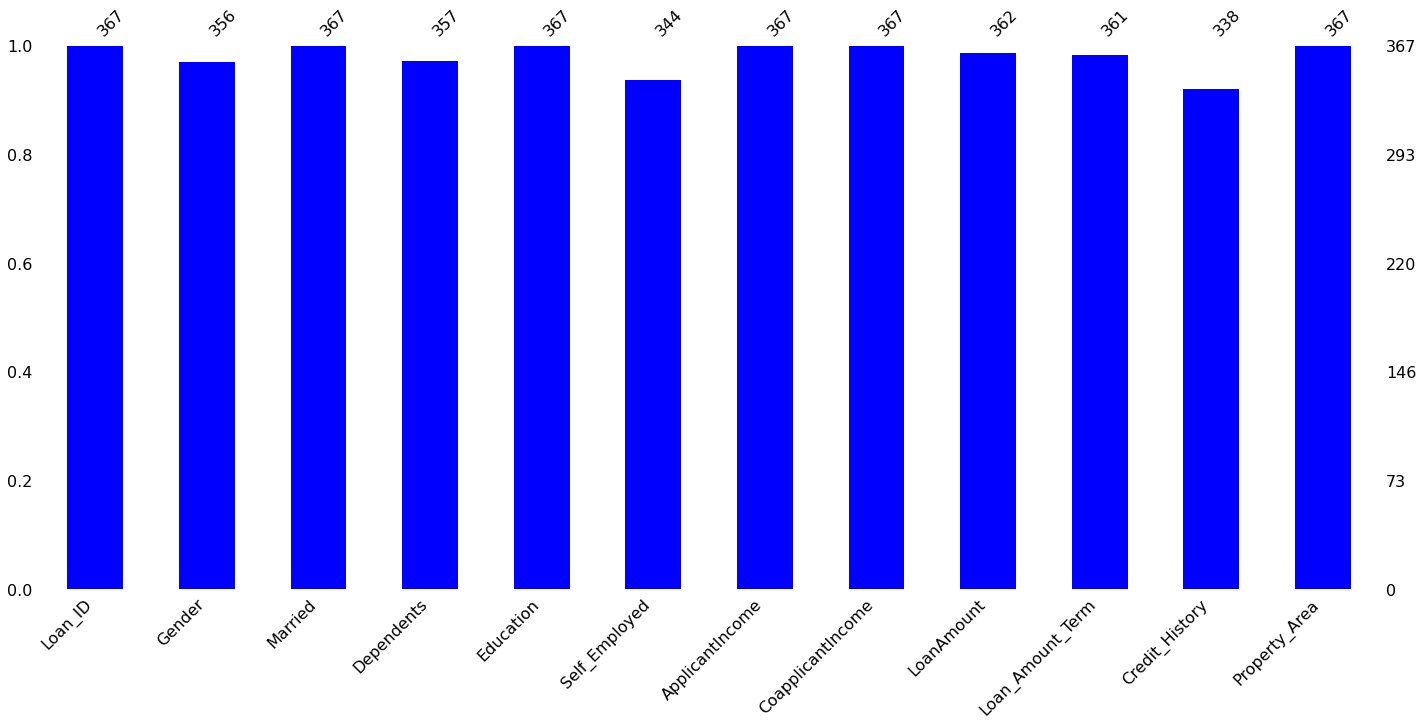

In [10]:
# visualizing Null values in Test Data in each columns:
msno.bar(data_test,color='blue')
plt.show()

In [11]:
# To get information of different datatypes present in each of Train Dataset: 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
# To get information of different datatypes present in each of Test Dataset: 
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
#different columns in Train Dataset:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#different columns in Test Dataset:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
#Dropping 'LoanID' Column in Train and Test data
data_train.drop(['Loan_ID'],axis=1,inplace=True)
data_test.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
#Null values present in Train Dataset:
data_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Null values present in Test Dataset:
data_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [20]:
data_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
data_test['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [22]:
data_train['Gender'].fillna("Male",inplace=True)

In [23]:
data_test['Gender'].fillna("Male",inplace=True)

In [24]:
data_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
data_test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
data_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
data_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [28]:
data_train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
data_test['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
data_train['Married'].fillna("Yes",inplace=True)

In [31]:
data_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
data_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [33]:
data_train['Dependents'] = data_train['Dependents'].replace({'3+':3})

In [34]:
data_test['Dependents'] = data_train['Dependents'].replace({'3+':3})

In [35]:
data_train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [36]:
data_test['Dependents'].value_counts()

0    211
1     60
2     54
3     31
Name: Dependents, dtype: int64

In [37]:
data_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [38]:
data_test['Education'].value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [39]:
data_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
data_test['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [41]:
data_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [42]:
data_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [43]:
data_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
data_test['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
data_train['Self_Employed'].fillna("Yes",inplace=True)

In [46]:
data_test['Self_Employed'].fillna("Yes",inplace=True)

In [47]:
data_train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
data_test['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
data_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
data_test['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [51]:
data_train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [53]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         356 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [54]:
#Replacing Null values with Mean and Mode Values in Train Dataset:
data_train['Dependents'] = data_train['Dependents'].fillna(data_train['Dependents'].mode()[0])
data_train['LoanAmount'] = data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean())
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mean())
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History']).mean()

In [55]:
#Replacing Null values with Mean and Mode Values in Test Dataset:
data_test['Dependents'] = data_test['Dependents'].fillna(data_test['Dependents'].mode()[0])
data_test['LoanAmount'] = data_test['LoanAmount'].fillna(data_test['LoanAmount'].mean())
data_test['Loan_Amount_Term'] = data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mean())
data_test['Credit_History'] = data_test['Credit_History'].fillna(data_test['Credit_History']).mean()

In [56]:
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
data_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [58]:
for col in data_train.columns:
    print(col,':',len(data_train[col].unique()),'counts')

Gender : 2 counts
Married : 2 counts
Dependents : 4 counts
Education : 2 counts
Self_Employed : 2 counts
ApplicantIncome : 505 counts
CoapplicantIncome : 287 counts
LoanAmount : 204 counts
Loan_Amount_Term : 11 counts
Credit_History : 1 counts
Property_Area : 3 counts
Loan_Status : 2 counts


In [59]:
for col in data_test.columns:
    print(col,':',len(data_test[col].unique()),'counts')

Gender : 2 counts
Married : 2 counts
Dependents : 4 counts
Education : 2 counts
Self_Employed : 2 counts
ApplicantIncome : 314 counts
CoapplicantIncome : 194 counts
LoanAmount : 145 counts
Loan_Amount_Term : 13 counts
Credit_History : 1 counts
Property_Area : 3 counts


<AxesSubplot:xlabel='Gender', ylabel='count'>

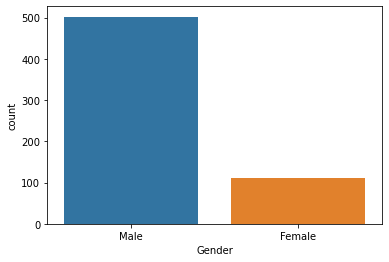

In [60]:
#visualizing "Gender" Column in Train Dataset:
sns.countplot(data_train['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

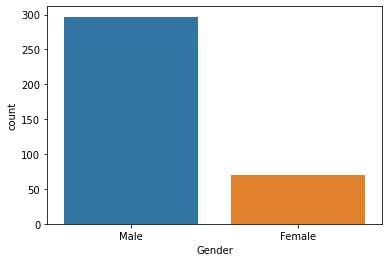

In [61]:
#visualizing "Gender" Column in Test Dataset:
sns.countplot(data_test['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

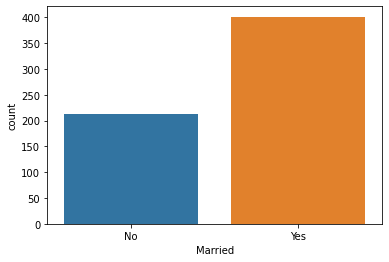

In [62]:
#visualizing "Married" Column in Train Dataset:
sns.countplot(data_train['Married'])

<AxesSubplot:xlabel='Married', ylabel='count'>

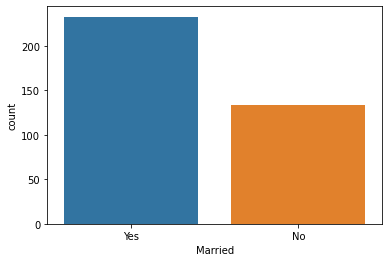

In [63]:
#visualizing "Married" Column in Test Dataset:
sns.countplot(data_test['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

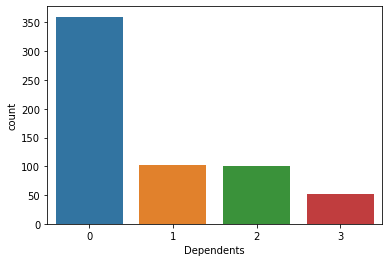

In [64]:
#visualizing "Dependents" Column in Train Dataset:
sns.countplot(data_train['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

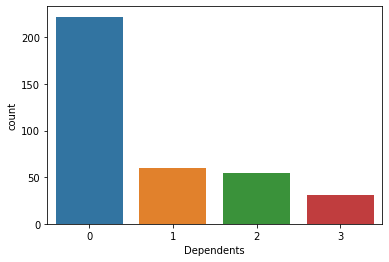

In [65]:
#visualizing "Dependents" Column in Test Dataset:
sns.countplot(data_test['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

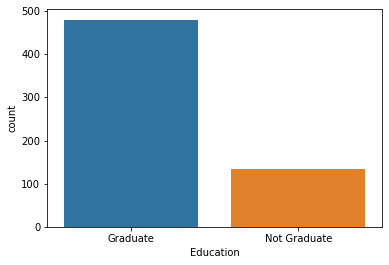

In [66]:
#visualizing "Education" Column in Train Dataset:
sns.countplot(data_train['Education'])

<AxesSubplot:xlabel='Education', ylabel='count'>

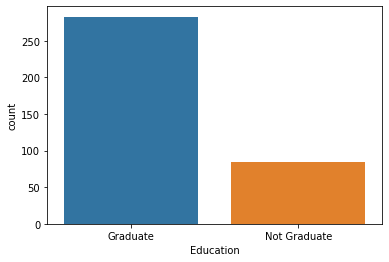

In [67]:
#visualizing "Education" Column in Test Dataset:
sns.countplot(data_test['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

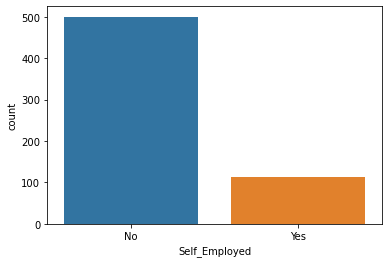

In [68]:
sns.countplot(data_train['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

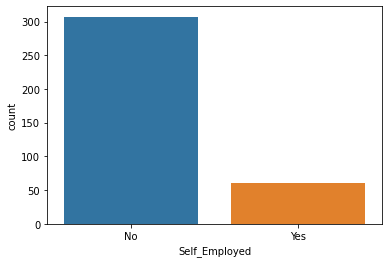

In [69]:
sns.countplot(data_test['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

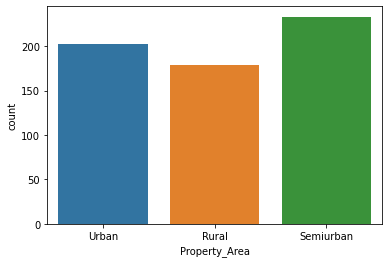

In [70]:
sns.countplot(data_train['Property_Area'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

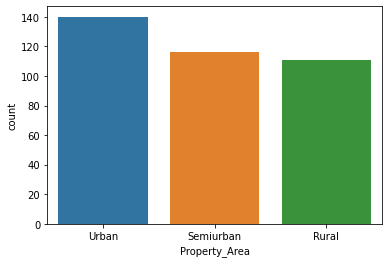

In [71]:
sns.countplot(data_test['Property_Area'])

In [72]:
Total_data = pd.concat([data_train,data_test],ignore_index=True)
Total_data.shape

(981, 12)

In [73]:
#Combining Applicant Income and Coapplicant Income To TotalIncome Column: 
Total_data['Total_Income'] = data_train['ApplicantIncome'] + data_test['CoapplicantIncome']
Total_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,0.842199,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0.842199,Rural,N,6083.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,0.842199,Urban,Y,4800.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,0.842199,Urban,Y,5129.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,0.842199,Urban,Y,6000.0


In [74]:
Total_data['LoanAmount'] = Total_data['LoanAmount']
Total_data['Total_Income'] = Total_data['Total_Income']

In [75]:
Total_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [76]:
Total_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,0.842199,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,0.842199,Rural,N,6083.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,0.842199,Urban,Y,4800.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,0.842199,Urban,Y,5129.0
4,Male,No,0,Graduate,No,141.000000,360.0,0.842199,Urban,Y,6000.0


In [77]:
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    object 
 1   Married           981 non-null    object 
 2   Dependents        981 non-null    object 
 3   Education         981 non-null    object 
 4   Self_Employed     981 non-null    object 
 5   LoanAmount        981 non-null    float64
 6   Loan_Amount_Term  981 non-null    float64
 7   Credit_History    981 non-null    float64
 8   Property_Area     981 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Total_Income      367 non-null    float64
dtypes: float64(4), object(7)
memory usage: 84.4+ KB


In [78]:
Total_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status         367
Total_Income        614
dtype: int64

In [79]:
Total_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [80]:
Total_data['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [81]:
Total_data['Loan_Status'].fillna("Y",inplace=True)

In [82]:
Total_data['Total_Income'].unique()

array([ 5849.,  6083.,  4800.,  5129.,  6000.,  8839.,  2333.,  3036.,
        4006., 15241.,  3200.,  4016.,  3073.,  1853.,  1299.,  4950.,
        6512.,  3843., 12803.,  6070.,  9280.,  5955.,  2600.,  3365.,
        8097., 33560.,  4049.,  7976.,  2275.,  6132.,  4166.,  3987.,
        6375.,  6208., 14041.,  5857.,  6459.,  5711.,  4418.,  1800.,
        4424.,  6541.,  4695.,  7310.,  7124.,  7723.,  5983.,  4250.,
        3635.,  3919.,  7307.,  5616., 11500.,  2708.,  2132.,  6905.,
       11744.,  3357.,  4221.,  3321.,  2609.,  6445.,  9309., 10750.,
        7100.,  9405.,  3208.,  1875.,  5275.,  6849.,  8849.,  7185.,
        6117.,  1000.,  7220.,  3333.,  4949.,  2395.,  1378.,  3988.,
       10366.,  5250.,  2500., 10581.,  5695.,  5244.,  6250.,  5773.,
        5779.,  5953.,  6782.,  6684.,  5227.,  4188.,  1759.,  4288.,
        4843., 13650.,  4652.,  6049.,  4339., 13177.,  7333.,  3800.,
        3421.,  5316.,  2929.,  3572., 10847.,  9804., 18706.,  4927.,
      

In [83]:
Total_data['Total_Income'] = Total_data['Total_Income'].fillna(0)

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    Total_data[col] = le.fit_transform(Total_data[col])

In [86]:
Total_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,0.842199,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,0.842199,0,0,6083.0
2,1,1,0,0,1,66.000000,360.0,0.842199,2,1,4800.0
3,1,1,0,1,0,120.000000,360.0,0.842199,2,1,5129.0
4,1,0,0,0,0,141.000000,360.0,0.842199,2,1,6000.0


In [87]:
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    int32  
 1   Married           981 non-null    int32  
 2   Dependents        981 non-null    object 
 3   Education         981 non-null    int32  
 4   Self_Employed     981 non-null    int32  
 5   LoanAmount        981 non-null    float64
 6   Loan_Amount_Term  981 non-null    float64
 7   Credit_History    981 non-null    float64
 8   Property_Area     981 non-null    int32  
 9   Loan_Status       981 non-null    int32  
 10  Total_Income      981 non-null    float64
dtypes: float64(4), int32(6), object(1)
memory usage: 61.4+ KB


<AxesSubplot:>

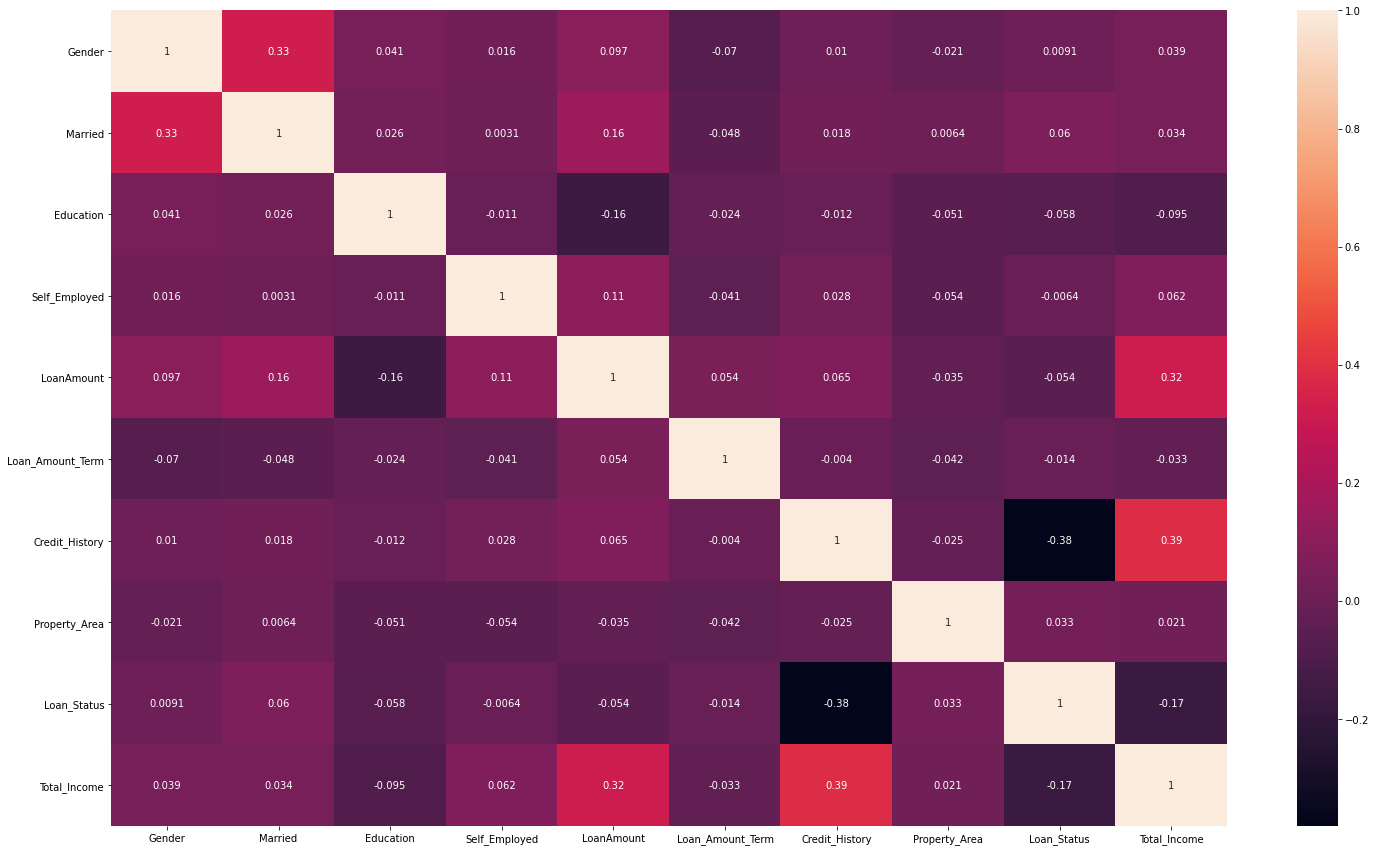

In [88]:
corr = Total_data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = Total_data.drop(['Loan_Status'],axis=1)
y = Total_data['Loan_Status']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression()

In [95]:
#predictions
y_pred = model.predict(X_test)

In [96]:
model.score(X_train,y_train)

0.15567488040973898

In [97]:
model.score(X_test,y_test)

0.15273984139476682

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression()

In [101]:
model.fit(X_train,y_train)

LogisticRegression()

In [102]:
#predictions
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [104]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  1,  46],
       [  0, 199]], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred)

0.8130081300813008

<AxesSubplot:>

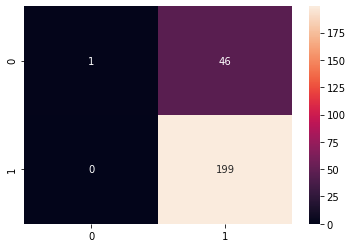

In [106]:
sns.heatmap(cfm,annot=True,fmt='d')

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
#by changing the random state accuracy will change a lot
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7804878048780488

In [109]:
from sklearn.model_selection import cross_val_score #k-fold cross validation

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_model,  x_train, y_train, cv=15, scoring ='accuracy')
print('Scores = ',scores)
print('Avg Score = ',scores.mean())

Scores =  [0.81632653 0.7755102  0.81632653 0.75510204 0.83673469 0.79591837
 0.7755102  0.79591837 0.81632653 0.7755102  0.75510204 0.7755102
 0.79591837 0.83673469 0.73469388]
Avg Score =  0.7904761904761906


In [111]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
scores = cross_val_score(logreg_model,  x_train, y_train, cv=10, scoring ='accuracy')
print('Scores = ',scores)
print('Avg Score = ',scores.mean())

Scores =  [0.83783784 0.7972973  0.81081081 0.7972973  0.81081081 0.80821918
 0.80821918 0.82191781 0.80821918 0.82191781]
Avg Score =  0.8122547204738986
